In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
ds_root_dir = "data/torobo/trajs:72_blocks:3" + "_triangle_v_scarce" #"_triangle_portion_v"
file_name = "train_ds.npy" #f"test_0.8.npy" 
data_file_path = os.path.join(ds_root_dir, file_name)
trajectories = np.load(data_file_path)
print("trajectories.shape", trajectories.shape)

trajectories.shape (360, 299, 35)


In [3]:
def visualize(data1, data2, data3, idx):
    # Extract x, y, z coordinates for all datasets
    x1, y1, z1 = data1[:idx, 0], data1[:idx, 1], data1[:idx, 2]
    x2, y2, z2 = data2[:idx, 0], data2[:idx, 1], data2[:idx, 2]
    x3, y3, z3 = data3[:idx, 0], data3[:idx, 1], data3[:idx, 2]

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the first trajectory
    ax.scatter(x1, y1, z1, label='Goal 1', marker='o')

    # Plot the second trajectory
    ax.scatter(x2, y2, z2, label='Goal 2', marker='^')

    # Plot the third trajectory
    ax.scatter(x3, y3, z3, label='Goal 3', marker='s')

    # Add labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    # Show the plot
    plt.show()

(360, 3)
(360, 3)
(360, 3)


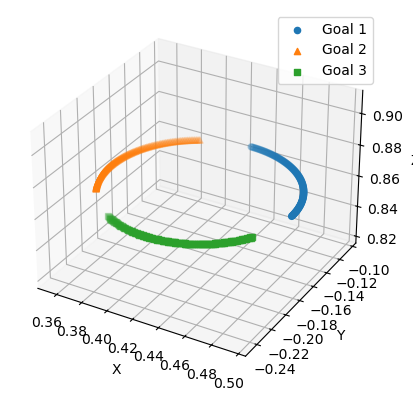

In [4]:
data1 = trajectories[:, 0, 15:18]
print(data1.shape)
data2 = trajectories[:, 0, 18:21]
print(data2.shape)
data3 = trajectories[:, 0, 21:24]
print(data3.shape)

visualize(data1, data2, data3, idx=90)

In [5]:
trajectories[:, :, 24:29][:10]

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.01996239],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.01995452],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.01993877],
        ...,
        [ 0.        ,  0.        ,  0.        ,  1.        ,
          0.02789908],
        [ 0.        ,  0.        ,  0.        ,  1.        ,
          0.02796105],
        [ 0.        ,  0.        ,  0.        ,  1.        ,
          0.02799203]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.01991456],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.01990677],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.01989119],
        ...,
        [ 0.        ,  0.        ,  0.        ,  1.        ,
          0.02786896],
        [ 0.        ,  0.        ,  0.        ,  1.        ,
          0.02793093],
        [ 0.        ,  0.        ,  0.        , 

Make the data scarce by selecting only every 5 degrees

In [6]:
print(trajectories.shape)
scarce_trajectories = trajectories[::5, :, :]
print(scarce_trajectories.shape)

(360, 299, 35)
(72, 299, 35)


(72, 3)
(72, 3)
(72, 3)


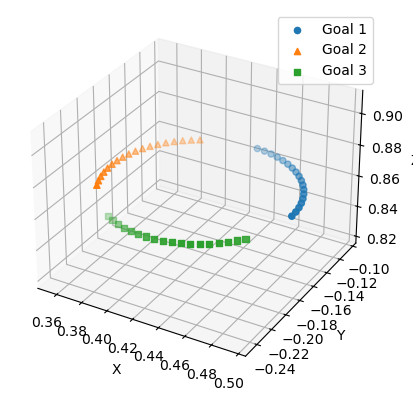

In [7]:
data1 = scarce_trajectories[:, 0, 15:18]
print(data1.shape)
data2 = scarce_trajectories[:, 0, 18:21]
print(data2.shape)
data3 = scarce_trajectories[:, 0, 21:24]
print(data3.shape)

visualize(data1, data2, data3, idx=18)

In [8]:
trajectories = scarce_trajectories

Split data

In [9]:
def split_data_interp(data, split_ratio):
    n_total = data.shape[0]
    n_train = int(n_total * split_ratio) + 1 # Number of samples in the first split

    # Generate a shuffled index array
    indices = np.random.permutation(n_total)
    print("five random indices", indices[:5])

    # Split the indices
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]

    # Create the splits
    train_data = data[train_indices]
    test_data = data[test_indices]

    return train_data, test_data

In [10]:
def split_data_extrap(data, split_ratio):
    n_total = data.shape[0]
    n_train = int(n_total * split_ratio) + 1 # Number of samples in the first split

    # Create the splits
    train_data = data[:n_train]
    test_data = data[n_train:]
    # train_data = data[n_train:]
    # test_data = data[:n_train]

    return train_data, test_data

In [11]:
def split_data_even(data):
    test_data = data[::2, :, :]
    train_data = data[1::2, :, :]
    return train_data, test_data

In [12]:
def save_file(array, path):
    with open(path, 'wb') as f:
        np.save(f, array)

In [13]:
ratio = 0.8
# train_data, test_data = split_data_interp(trajectories, ratio)
train_data, test_data = split_data_extrap(trajectories, ratio)
# train_data, test_data = split_data_even(trajectories)

# Check the shapes
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (58, 299, 35)
Test data shape: (14, 299, 35)


In [14]:
data_file_path = os.path.join(ds_root_dir, f'train_extrap_{ratio}.npy')
save_file(train_data, data_file_path)

data_file_path = os.path.join(ds_root_dir, f'test_extrap_{ratio}.npy')
save_file(test_data, data_file_path)

(14, 3)
(14, 3)
(14, 3)


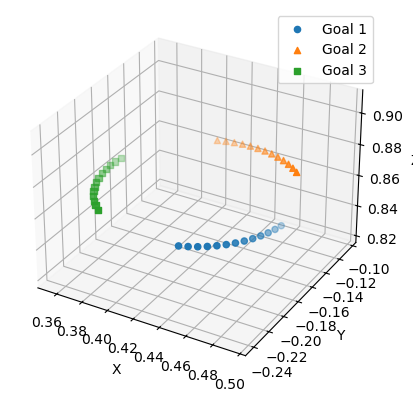

In [15]:
data1 = test_data[:, 0, 15:18]
print(data1.shape)
data2 = test_data[:, 0, 18:21]
print(data2.shape)
data3 = test_data[:, 0, 21:24]
print(data3.shape)

visualize(data1, data2, data3, idx=-1)#len(data1))

Every other element in test set.

### Closest points

In [16]:
# # ds_root_dir = "data/torobo/trajs:2000_blocks:3_random"
# file_name = f"train_0.8.npy" #"train_0.95.npy" #
# data_file_path = os.path.join(ds_root_dir, file_name)
# trajectories_train = np.load(data_file_path)
# print("trajectories.shape", trajectories_train.shape)

# file_name = f"test_0.8.npy"
# data_file_path = os.path.join(ds_root_dir, file_name)
# trajectories_test = np.load(data_file_path)
# print("trajectories.shape", trajectories_test.shape)

In [17]:
print(train_data.shape)
print(test_data.shape)
trajectories_train = train_data
trajectories_test = test_data

(58, 299, 35)
(14, 299, 35)


In [18]:
coords_train = trajectories_train[:, 0, 15:24]
print(coords_train.shape)
coords_test = trajectories_test[:, 0, 15:24]
print(coords_test.shape)

(58, 9)
(14, 9)


In [19]:
def get_dist(test_point, train_point, flag):
    d1 = np.linalg.norm(test_point[0:3] - train_point[0:3])
    d2 = np.linalg.norm(test_point[3:6] - train_point[3:6])
    d3 = np.linalg.norm(test_point[6:9] - train_point[6:9])

    if flag:
        return d1+d2+d3
    else:
        return math.sqrt(d1**2 + d2**2 + d3**3)

In [20]:
flag = True
min_dist_arr = []
min_ind_arr = []
for i in range(len(coords_test)):
    # if i>=3:
    #     break
    test_point = coords_test[i]

    min_dist = float('inf')
    min_ind = None
    for j in range(len(coords_train)):
        # if j>=3:
        #     break
        train_point = coords_train[j]
        distance = get_dist(test_point, train_point, flag)

        if distance < min_dist:
            min_dist = distance
            min_ind = j
    
    min_dist_arr.append(min_dist)
    min_ind_arr.append(min_ind)

In [21]:
print(len(min_dist_arr))
print(len(min_ind_arr))
min_ind_arr[:5]

14
14


[57, 57, 57, 57, 57]

In [22]:
# # Example arrays (replace these with your actual arrays)
# # coords_test = np.random.rand(100, 9)  # Shape (100, 9)
# # coords_train = np.random.rand(1900, 9)  # Shape (1900, 9)

# # Compute the absolute differences and sum along axis 2
# distances = np.abs(coords_test[:, None, :] - coords_train[None, :, :]).sum(axis=2)

# # Find the indices of the minimum distances
# closest_indices = np.argmin(distances, axis=1)
# closest_distances = np.min(distances, axis=1)

# # Retrieve the corresponding closest points from array2
# closest_points = coords_train[closest_indices]

# # # Print results
# # print("Closest indices:", closest_indices)
# # print("Closest points:", closest_points)
# print(closest_points.shape)

In [23]:
if flag: dir_name = "add"
else: dir_name = "exp2"
ana_path = os.path.join(ds_root_dir, f"analysis_extrap/closest/{dir_name}")
if not os.path.exists(ana_path):
    os.makedirs(ana_path)

for i in range(len(coords_test)):
    test_point = coords_test[i]
    point1_t = test_point[0:2]
    point2_t = test_point[3:5]
    point3_t = test_point[6:8]

    closest_point = coords_train[min_ind_arr[i]] #closest_points[i]
    point1_c = closest_point[0:2]
    point2_c = closest_point[3:5]
    point3_c = closest_point[6:8]

    dist = min_dist_arr[i] #closest_distances[i]

    plt.scatter(point1_t[0], point1_t[1], color='blue', label='p1')
    plt.scatter(point1_c[0], point1_c[1], marker='X', color='blue', label='p1c')

    plt.scatter(point2_t[0], point2_t[1], color='green', label='p2')
    plt.scatter(point2_c[0], point2_c[1], marker='X', color='green', label='p2c')

    plt.scatter(point3_t[0], point3_t[1], color='red', label='p3')
    plt.scatter(point3_c[0], point3_c[1], marker='X', color='red', label='p3c')

    plt.title(f'Dist. {round(dist*100, 3)} cm')
    plt.legend()
    plt_path = os.path.join(ana_path, f"plt_{i+1}.png")
    plt.savefig(plt_path)
    # plt.show()
    plt.close()

In [24]:
dist_arr = np.array(min_dist_arr)
dist_mean = np.mean(dist_arr) * 100
print(dist_mean)

log_path = os.path.join(ana_path, "log.txt")
with open(log_path, 'w') as output:
    output.write(f"mean of dist. of test points to their closest train points = {dist_mean} cm.")

7.265483751269246


#### Individual Goals

In [25]:
def visualize_test_train(goal_train, goal_test, file_path):
    # Extract x, y, z coordinates for all datasets
    x1, y1, z1 = goal_train[:, 0], goal_train[:, 1], goal_train[:, 2]
    x2, y2, z2 = goal_test[:, 0], goal_test[:, 1], goal_test[:, 2]

    # Plot the first trajectory
    plt.scatter(x1, y1, label='Train')
    plt.scatter(x2, y2, label='Test')
    plt.legend()

    # Show the plot
    plt.savefig(file_path)
    plt.show()

(58, 9) (58, 3)
(14, 9) (14, 3)


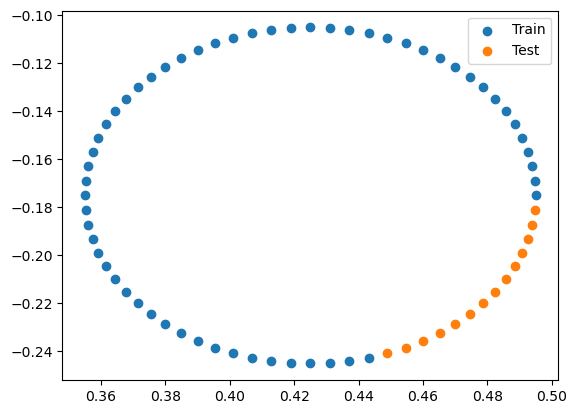

In [26]:
goal_1_train = coords_train[:, :3]
goal_1_test = coords_test[:, :3]
print(coords_train.shape, goal_1_train.shape)
print(coords_test.shape, goal_1_test.shape)

dir_path = os.path.join(ds_root_dir, "analysis_extrap")
file_path = os.path.join(dir_path, "goal_1.png")

visualize_test_train(goal_1_train, goal_1_test, file_path)

(58, 9) (58, 3)
(14, 9) (14, 3)


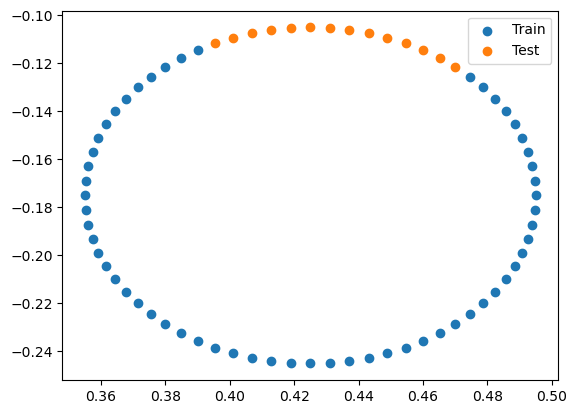

In [27]:
goal_1_train = coords_train[:, 3:6]
goal_1_test = coords_test[:, 3:6]
print(coords_train.shape, goal_1_train.shape)
print(coords_test.shape, goal_1_test.shape)

file_path = os.path.join(dir_path, "goal_2.png")

visualize_test_train(goal_1_train, goal_1_test, file_path)

(58, 9) (58, 3)
(14, 9) (14, 3)


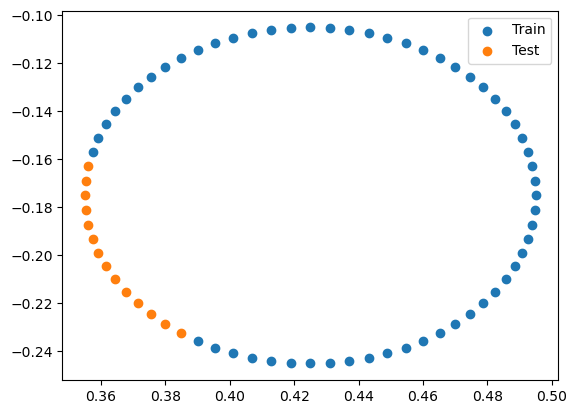

In [28]:
goal_1_train = coords_train[:, 6:9]
goal_1_test = coords_test[:, 6:9]
print(coords_train.shape, goal_1_train.shape)
print(coords_test.shape, goal_1_test.shape)

file_path = os.path.join(dir_path, "goal_3.png")

visualize_test_train(goal_1_train, goal_1_test, file_path)